In [17]:
import pandas as pd
import numpy as np
import random as rnd
from scipy.io.arff import loadarff

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score

# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error

# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelBinarizer


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
#import umap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

# Import for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [18]:
raw_data = loadarff('data/cleaned/pc5.arff')
df_data = pd.DataFrame(raw_data[0])
df_data

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.00,0.0,1.0,...,2.0,1.00,0.0,1.0,0.0,1.0,1.0,0.00,0.0,b'N'
1,8.0,5.0,9.0,0.0,6.0,8.0,3.0,0.19,4.0,1.0,...,24.0,0.09,33.0,58.0,14.0,14.0,34.0,27.27,16.0,b'N'
2,3.0,1.0,4.0,0.0,3.0,0.0,1.0,0.17,0.0,1.0,...,6.0,0.07,11.0,18.0,7.0,9.0,15.0,33.33,6.0,b'N'
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.33,0.0,1.0,...,3.0,0.14,4.0,9.0,4.0,8.0,7.0,0.00,3.0,b'N'
4,3.0,25.0,0.0,18.0,9.0,40.0,13.0,0.19,16.0,1.0,...,32.0,0.15,108.0,134.0,18.0,19.0,86.0,35.06,68.0,b'N'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16957,4.0,11.0,8.0,0.0,3.0,16.0,1.0,0.03,8.0,1.0,...,27.0,0.02,68.0,76.0,35.0,12.0,48.0,7.14,39.0,b'N'
16958,0.0,3.0,3.0,0.0,0.0,4.0,1.0,0.13,2.0,1.0,...,9.0,0.10,20.0,22.0,13.0,7.0,10.0,0.00,8.0,b'N'
16959,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.17,0.0,1.0,...,2.0,0.13,5.0,1.0,2.0,1.0,8.0,0.00,6.0,b'N'
16960,1.0,1.0,4.0,3.0,0.0,0.0,1.0,0.10,0.0,1.0,...,6.0,0.08,17.0,20.0,14.0,6.0,13.0,30.00,10.0,b'N'


In [65]:
df_data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16962 entries, 0 to 16961
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        16962 non-null  float64
 1   BRANCH_COUNT                     16962 non-null  float64
 2   CALL_PAIRS                       16962 non-null  float64
 3   LOC_CODE_AND_COMMENT             16962 non-null  float64
 4   LOC_COMMENTS                     16962 non-null  float64
 5   CONDITION_COUNT                  16962 non-null  float64
 6   CYCLOMATIC_COMPLEXITY            16962 non-null  float64
 7   CYCLOMATIC_DENSITY               16962 non-null  float64
 8   DECISION_COUNT                   16962 non-null  float64
 9   DESIGN_COMPLEXITY                16962 non-null  float64
 10  DESIGN_DENSITY                   16962 non-null  float64
 11  EDGE_COUNT                       16962 non-null  float64
 12  ESSENTIAL_COMPLEXI

In [66]:
df_data.describe() #shows simple statistics (min, max, mean, etc.)

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,16962.000000,16962.000000,16962.000000,16962.000000,16962.000000,16962.000000,16962.000000,16962.000000,16962.000000,16962.000000,...,16962.000000,16962.000000,16962.000000,16962.000000,16962.000000,16962.000000,16962.000000,16962.000000,16962.000000,16962.000000
mean,1.366054,2.883917,0.631293,0.481016,1.681936,3.130527,1.975003,0.542105,1.327320,1.376548,...,1.629820,5.965511,0.286844,14.835397,24.129230,4.521047,4.484141,14.838816,4.229380,9.521519
std,12.822247,14.466359,2.212278,3.085064,16.646452,24.010081,7.420118,0.251830,10.183716,3.303685,...,12.839782,27.633131,0.202635,127.164295,210.937326,26.097461,4.279696,87.777585,12.389354,62.775792
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,1.000000,...,0.000000,2.000000,0.200000,0.000000,3.000000,0.000000,3.000000,4.000000,0.000000,2.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,1.000000,...,0.000000,2.000000,0.250000,1.000000,3.000000,1.000000,3.000000,4.000000,0.000000,2.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,1.000000,...,0.000000,3.000000,0.250000,3.000000,7.000000,3.000000,6.000000,5.000000,0.000000,2.000000
max,704.000000,731.000000,69.000000,180.000000,901.000000,1090.000000,366.000000,1.500000,448.000000,223.000000,...,578.000000,1078.000000,1.000000,5169.000000,10862.000000,2241.000000,85.000000,3025.000000,94.740000,2072.000000


In [19]:
# trasform to binary and extract target dont run twice
df_data['Defective'] = df_data['Defective'].apply(lambda x: 1 if x == b'Y' else 0)
df_data.groupby("Defective").size()

Defective
0    16460
1      502
dtype: int64

In [6]:
# metric correlations- (step 1)

In [20]:
df_data.corr('spearman')

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
LOC_BLANK,1.000000,0.860947,0.355220,0.717017,0.716126,0.849418,0.855558,-0.601076,0.852200,0.562391,...,0.691239,-0.521879,0.591987,0.593316,0.578335,0.587492,0.631058,0.818190,0.648998,0.399165
BRANCH_COUNT,0.860947,1.000000,0.315384,0.743177,0.659586,0.981097,0.993810,-0.546287,0.980675,0.662737,...,0.722808,-0.429651,0.595333,0.602112,0.578734,0.607706,0.622344,0.798395,0.647892,0.388750
CALL_PAIRS,0.355220,0.315384,1.000000,0.262863,0.367321,0.318819,0.307627,-0.416982,0.317700,0.495027,...,0.807648,-0.495677,0.579837,0.659459,0.596291,0.645436,0.504920,0.318181,0.425988,0.319572
LOC_CODE_AND_COMMENT,0.717017,0.743177,0.262863,1.000000,0.489409,0.721448,0.738809,-0.532738,0.720765,0.498436,...,0.558572,-0.431066,0.505614,0.439478,0.467582,0.429473,0.546146,0.814676,0.584733,0.328929
LOC_COMMENTS,0.716126,0.659586,0.367321,0.489409,1.000000,0.638810,0.652463,-0.468587,0.639649,0.555951,...,0.550961,-0.437084,0.487017,0.483203,0.482323,0.477972,0.528968,0.785838,0.519051,0.406606
CONDITION_COUNT,0.849418,0.981097,0.318819,0.721448,0.638810,1.000000,0.973595,-0.536863,0.999570,0.659996,...,0.710248,-0.426461,0.585479,0.591608,0.567889,0.596341,0.611657,0.786740,0.635826,0.393931
CYCLOMATIC_COMPLEXITY,0.855558,0.993810,0.307627,0.738809,0.652463,0.973595,1.000000,-0.540643,0.973093,0.666023,...,0.717949,-0.423878,0.591116,0.597924,0.574309,0.603766,0.618209,0.793765,0.643361,0.378789
CYCLOMATIC_DENSITY,-0.601076,-0.546287,-0.416982,-0.532738,-0.468587,-0.536863,-0.540643,1.000000,-0.541385,-0.392894,...,-0.578857,0.895315,-0.733214,-0.714627,-0.711700,-0.674178,-0.895484,-0.587657,-0.969991,-0.281324
DECISION_COUNT,0.852200,0.980675,0.317700,0.720765,0.639649,0.999570,0.973093,-0.541385,1.000000,0.656682,...,0.710160,-0.431787,0.585387,0.591289,0.568032,0.596103,0.611930,0.787027,0.636307,0.394222
DESIGN_COMPLEXITY,0.562391,0.662737,0.495027,0.498436,0.555951,0.659996,0.666023,-0.392894,0.656682,1.000000,...,0.484979,-0.319782,0.408783,0.417034,0.401030,0.417997,0.424267,0.521358,0.451650,0.510366


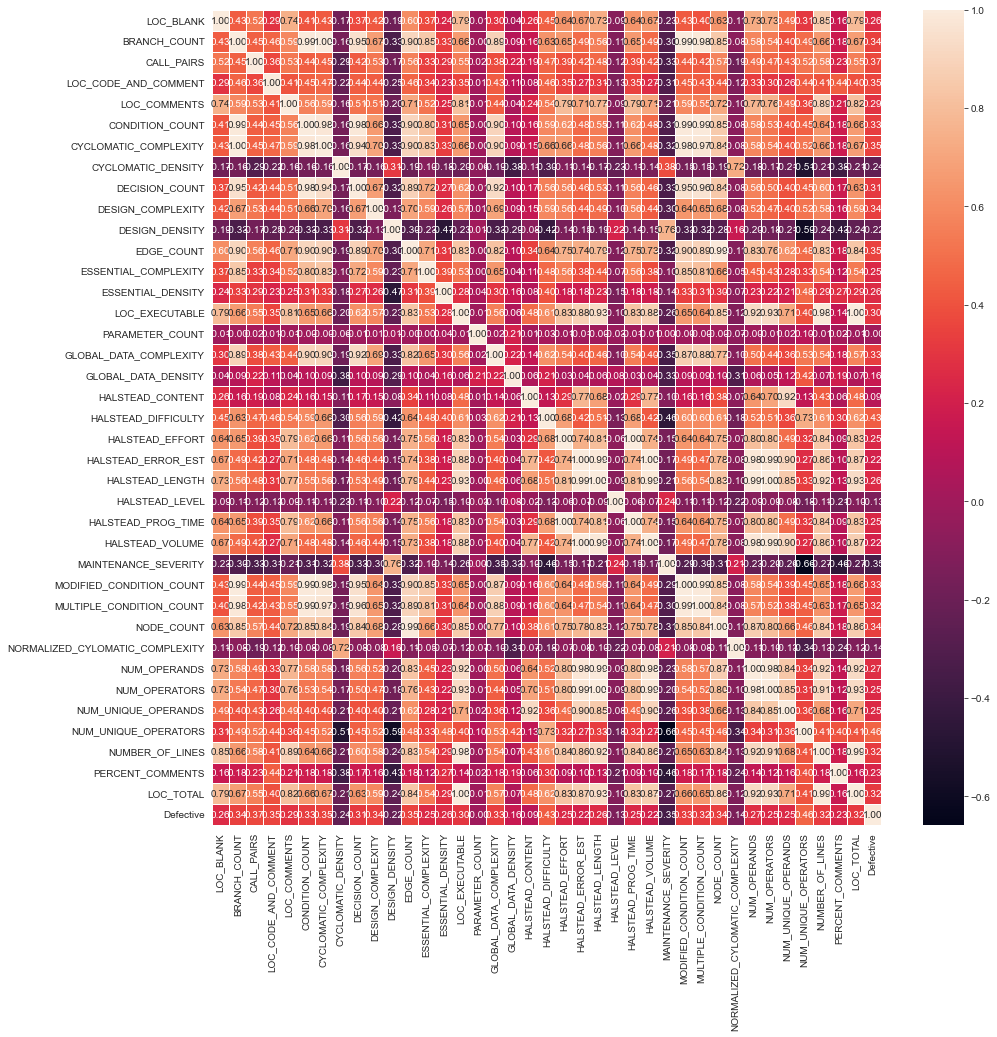

In [69]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df_data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [21]:
cor_matrix = df_data.corr('spearman').abs()

In [22]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                 LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  \
LOC_BLANK                              NaN      0.860947    0.355220   
BRANCH_COUNT                           NaN           NaN    0.315384   
CALL_PAIRS                             NaN           NaN         NaN   
LOC_CODE_AND_COMMENT                   NaN           NaN         NaN   
LOC_COMMENTS                           NaN           NaN         NaN   
CONDITION_COUNT                        NaN           NaN         NaN   
CYCLOMATIC_COMPLEXITY                  NaN           NaN         NaN   
CYCLOMATIC_DENSITY                     NaN           NaN         NaN   
DECISION_COUNT                         NaN           NaN         NaN   
DESIGN_COMPLEXITY                      NaN           NaN         NaN   
DESIGN_DENSITY                         NaN           NaN         NaN   
EDGE_COUNT                             NaN           NaN         NaN   
ESSENTIAL_COMPLEXITY                   NaN           NaN        

In [23]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)

['BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY', 'DECISION_COUNT', 'DESIGN_DENSITY', 'EDGE_COUNT', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'GLOBAL_DATA_COMPLEXITY', 'GLOBAL_DATA_DENSITY', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'NUMBER_OF_LINES', 'PERCENT_COMMENTS', 'LOC_TOTAL']


In [24]:
df_data = df_data.drop(df_data[to_drop], axis=1)

In [25]:
df_data.shape

(16962, 8)

In [199]:
# Variance inflation factor analysis  (VIF) - setp 2

In [26]:
def vif(features):

    # Prepare a dataframe for VIF
    X_VIF = add_constant(features)

    # Simulate a multicollinearity situation of AddedLOC, A, and B
    #X_VIF['A'] = [2 * x_i + random.random() for x_i in X_VIF['AddedLOC']]
    #X_VIF['B'] = [3 * x_i + random.random() for x_i in X_VIF['AddedLOC']]

    # Calculate VIF scores
    vif_scores = pd.DataFrame([variance_inflation_factor(X_VIF.values, i) 
                   for i in range(X_VIF.shape[1])], 
                  index=X_VIF.columns)
    # Prepare a final dataframe of VIF scores
    vif_scores.reset_index(inplace = True)
    vif_scores.columns = ['Feature', 'VIFscore']
    vif_scores = vif_scores.loc[vif_scores['Feature'] != 'const', :]
    vif_scores = vif_scores.sort_values(by = ['VIFscore'], ascending = False)
    return vif_scores

In [27]:
X = df_data.iloc[:, 0:-1]
y = df_data["Defective"]

#y = df_data.pop('Defective')
#X = df_data

print("X:", X.shape)
print("y:", y.shape)

X: (16962, 7)
y: (16962,)


In [28]:
vif(X)

,Feature,VIFscore
4,DESIGN_COMPLEXITY,1.906092
2,CALL_PAIRS,1.749504
5,ESSENTIAL_COMPLEXITY,1.582407
1,LOC_BLANK,1.479063
3,CYCLOMATIC_DENSITY,1.192381
7,HALSTEAD_LEVEL,1.104407
6,PARAMETER_COUNT,1.006933


In [ ]:
#Drop Branch_Count

In [203]:
#X= X.drop(labels='BRANCH_COUNT',axis='columns')

In [29]:
X.columns

Index(['LOC_BLANK', 'CALL_PAIRS', 'CYCLOMATIC_DENSITY', 'DESIGN_COMPLEXITY',
       'ESSENTIAL_COMPLEXITY', 'PARAMETER_COUNT', 'HALSTEAD_LEVEL'],
      dtype='object')

In [ ]:
#resampling

Classes: [0, 1]
Counts: [16460, 502]


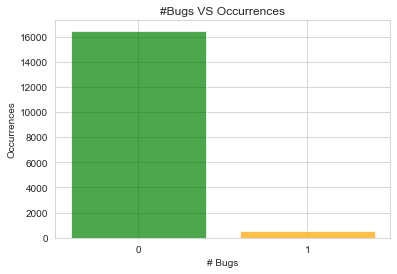

In [30]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [19]:
#oversampling using SMOTE up to 30%

In [31]:
from imblearn.over_sampling import SMOTE
X_train_over_sampled, y_train_over_sampled = SMOTE(sampling_strategy=0.3).fit_resample(X, y)
#X_cv_over_sampled, y_cv_over_sampled = SMOTE().fit_resample(X_cv, y_cv)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape)

Train: (21398, 7) (21398,)


Classes: [0, 1]
Counts: [16460, 4938]


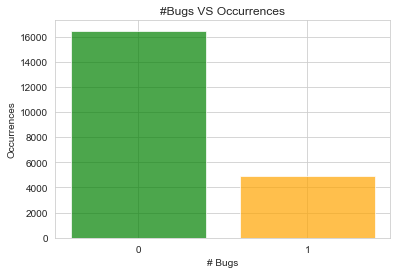

In [32]:
unique, counts = np.unique(y_train_over_sampled, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [33]:
bugs= y_train_over_sampled.groupby(y_train_over_sampled)
bugs.size()

Defective
0    16460
1     4938
Name: Defective, dtype: int64

In [34]:
data = pd.concat([X_train_over_sampled, y_train_over_sampled], axis=1)

In [35]:
data

,LOC_BLANK,CALL_PAIRS,CYCLOMATIC_DENSITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,PARAMETER_COUNT,HALSTEAD_LEVEL,Defective
0,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0
1,8.000000,9.000000,0.190000,1.000000,1.000000,0.0,0.060000,0
2,3.000000,4.000000,0.170000,1.000000,1.000000,0.0,0.140000,0
3,0.000000,1.000000,0.330000,1.000000,1.000000,0.0,0.250000,0
4,3.000000,0.000000,0.190000,1.000000,9.000000,0.0,0.020000,0
...,...,...,...,...,...,...,...,...
21393,4.624343,3.751313,0.191165,3.000000,7.248687,0.0,0.056296,1
21394,0.000000,2.000000,0.500000,1.000000,1.000000,0.0,0.500000,1
21395,0.000000,2.000000,0.330000,1.000000,1.000000,0.0,0.330000,1
21396,7.000000,5.000000,0.154593,5.615632,1.000000,0.0,0.055375,1


In [84]:
# save the dataset for c5
filename = 'pc5.csv'
data.to_csv('data/cleaned/expr1/{}'.format(filename),sep=',')

In [ ]:
# Model Construction

In [37]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train_over_sampled, X_test_over_sampled, y_train_over_sampled, y_test_over_sampled = train_test_split(X_train_over_sampled, y_train_over_sampled, test_size=0.3,random_state=7)
X_cv_over_sampled, X_test_over_sampled, y_cv_over_sampled, y_test_over_sampled = train_test_split(X_test_over_sampled, y_test_over_sampled, test_size=0.5)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape,
      "Test:", X_test_over_sampled.shape, y_test_over_sampled.shape,
      "Cross Validation", X_cv_over_sampled.shape, y_cv_over_sampled.shape)

Train: (14978, 7) (14978,) Test: (3210, 7) (3210,) Cross Validation (3210, 7) (3210,)


In [38]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=False, n_jobs=True, pca=False):
    
    if scale & pca:
        pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('dim_reduct', PCA(n_components=4)),
            ('clf', model())])
        print("Scaling and dim reduct...")
        
    elif scale:
        pipeline = Pipeline([ ('scale', StandardScaler()), ('clf', model())])
        
    elif pca:
        pipeline = Pipeline([
        ('dim_reduct', PCA(n_components=pca)),
        ('clf', model())])
    else:
        pipeline = Pipeline([('clf', model())])
        
    grid = GridSearchCV(pipeline, param_grid = params, cv=5, n_jobs=4, refit=True)
    grid.fit(X_cv, y_cv)
    
    best_prameters = {}
    for k, v in grid.best_params_.items():
        best_prameters[k[5:]] = v

    if n_jobs:
        model = model(**best_prameters, n_jobs=4)
    else:
        model = model(**best_prameters)
   
    model.fit(X_train, y_train)
    
    print("Best Parameters for model:", best_prameters)

    return {
        "model": model, 
        "best_params":best_prameters
    }

In [71]:
# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']
    1. classification report
    2. confusion matrix
    '''
    y_val = np.reshape(y_val, -1).astype(np.int32)
    y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred,labels=[0,1]).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
    auc = roc_auc_score(y_val, y_pred)
    print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [40]:
def model_eval(model, X_test, y_test, acc=True, recall_=True, auc_=True, plot_conf=True, plot_auc=True, f1=True, prop=False):
    
    res = [None, None, None, None] # Accuracy, auc_roc, f1_score, recall
    y_pred = model.predict(X_test)
    
    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)
    
    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc
        
    if acc:
        res[0] = accuracy_score(y_test, y_pred)
        print('accuracy:', res[0] * 100 ,'%')
              
    if recall_:
        res[3]= recall_score(y_test, y_pred, average='macro')
        print('recall:', res[3] * 100 ,'%')
              
    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)
              
        res[1] = roc_auc_score(truth, y_pred_encode, average = 'macro')
        print('ROC:', res[1] * 100 ,'%')
              
    if plot_conf:
        fig, ax = plt.subplots(figsize=(10,6))

        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap= 'Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix');
    
    if plot_auc:
        fig, ax = plt.subplots(figsize=(10,6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)

            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = [None, None, None]
        tpr = [None, None, None]
        auc_of_roc = [None, None, None]
        
        #n_classes = (0, 1)
        
        for i in range(0,1):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])
            
        plt.plot(fpr[0], tpr[0], label='0 - area under ROC = %0.3f' % auc_of_roc[0])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC AUC");
        plt.legend()

    return res

In [41]:
scores = {}

In [78]:
# classifiers after removing multi-columuiray

In [79]:
#adaboost

In [42]:
# AdaBoostClassifier
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, ada_params, scale=False, n_jobs=False)

Best Parameters for model: {'learning_rate': 1.0, 'n_estimators': 200}


accuracy: 94.26791277258567 %
recall: 92.835235280964 %
ROC: 92.83523528096399 %


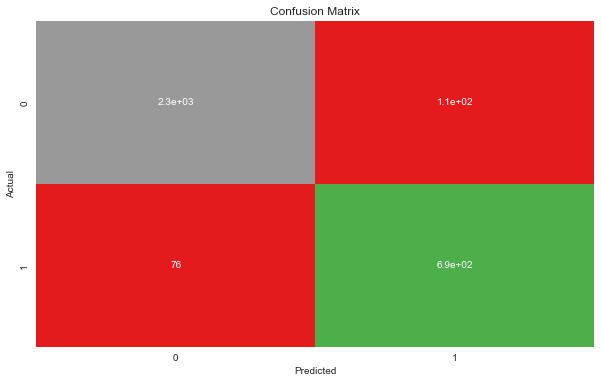

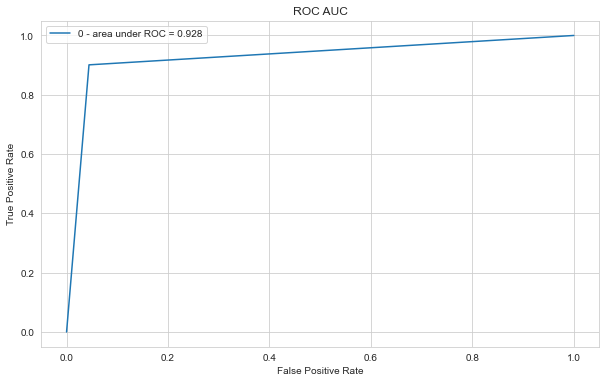

In [72]:
model_scoring = model_eval(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                              "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                              "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

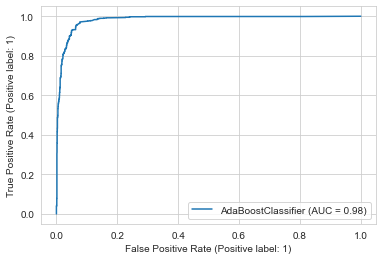

In [73]:
ROC_curve = plot_roc_curve(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
#xgboost

In [45]:
xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, xg_params, scale=False, n_jobs=5)

[23:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'reg_alpha': 1.1, 'subsample': 0.8}


accuracy: 97.53894080996885 %
recall: 96.77312877011775 %
ROC: 96.77312877011775 %


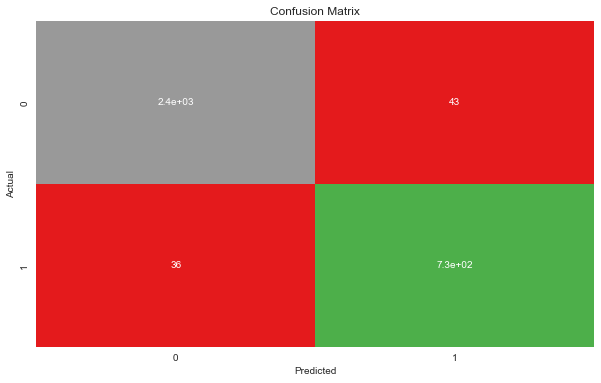

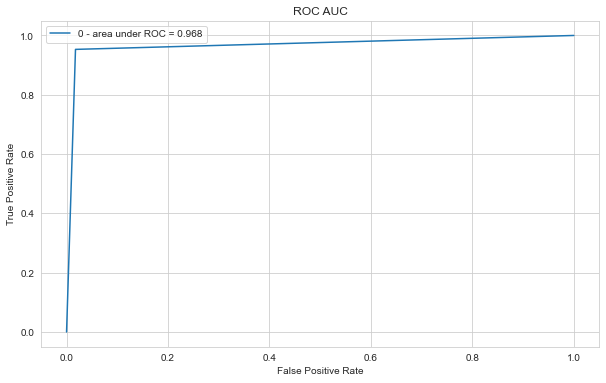

In [74]:
model_scoring = model_eval(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                              "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                              "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

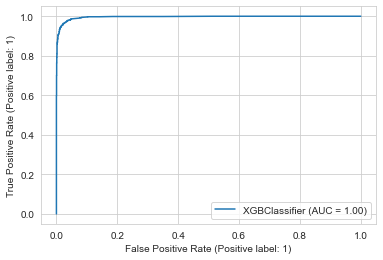

In [75]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [48]:
rfc_params = {
    'clf__n_estimators'      : [200, 500],
    'clf__max_depth'         : [10, 20],
    'clf__max_features': [1.0, 0.7, 0.4],
    'clf__criterion' :['gini', 'entropy']
}

rfc = Modeler(RandomForestClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, rfc_params, scale=False) 

Best Parameters for model: {'criterion': 'gini', 'max_depth': 20, 'max_features': 0.7, 'n_estimators': 200}


accuracy: 97.07165109034268 %
recall: 97.0027980857955 %
ROC: 97.00279808579552 %


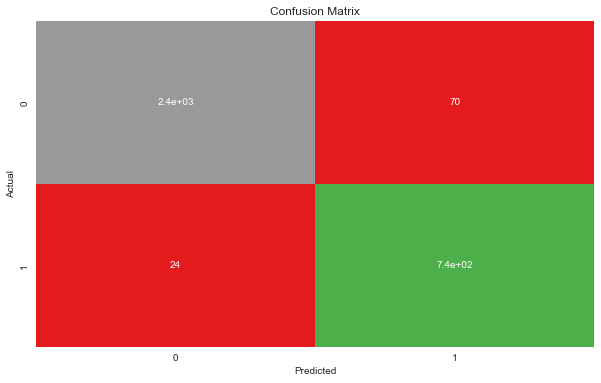

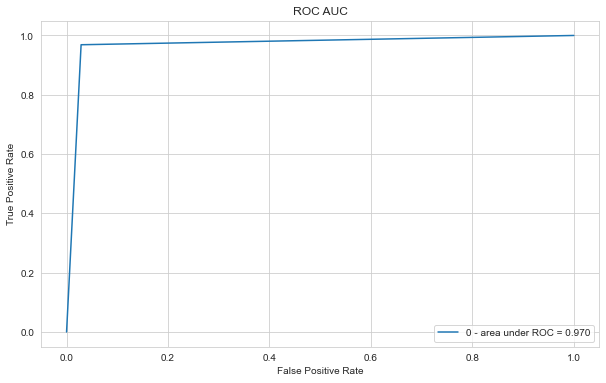

In [76]:
model_scoring = model_eval(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                              "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                              "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

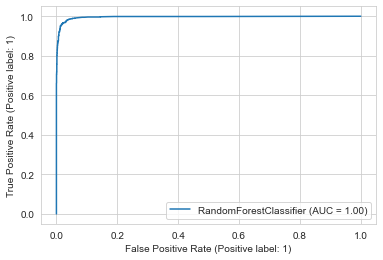

In [77]:
ROC_curve = plot_roc_curve(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [51]:
# SVC()
svc_params = {
    'clf__C': [0.1, 1],
    'clf__kernel': ['rbf'],
    'clf__gamma':[1, 0.01]
}

svc = Modeler(SVC, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, svc_params, scale=False, n_jobs=False)

Best Parameters for model: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


accuracy: 94.67289719626169 %
recall: 93.7721377258068 %
ROC: 93.7721377258068 %


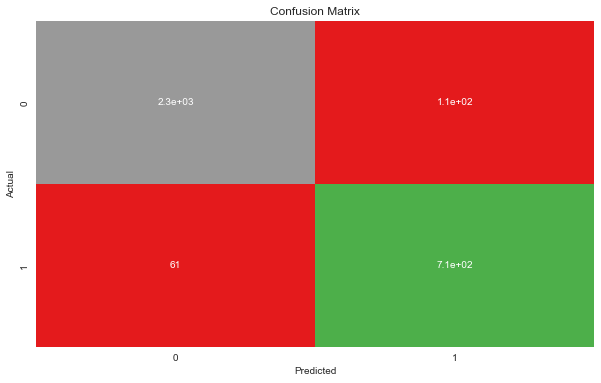

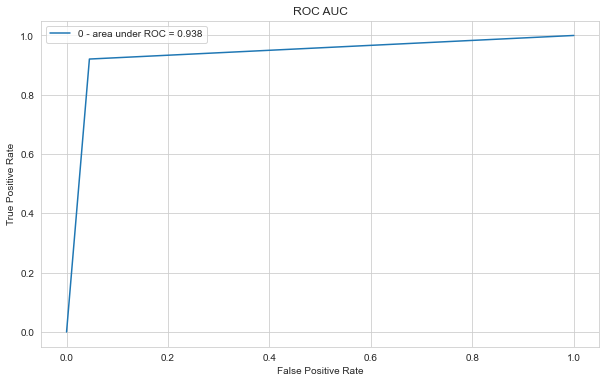

In [78]:
model_scoring = model_eval(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                              "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                              "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

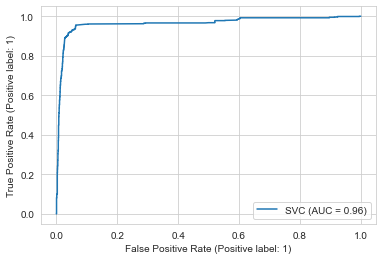

In [79]:
ROC_curve = plot_roc_curve(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# naive_bayes

In [54]:
naive_bayes = Modeler(GaussianNB, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled,params={}, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 86.72897196261682 %
recall: 74.19725143973602 %
ROC: 74.19725143973602 %


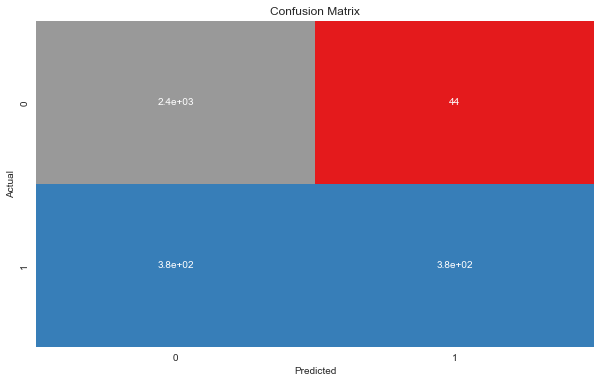

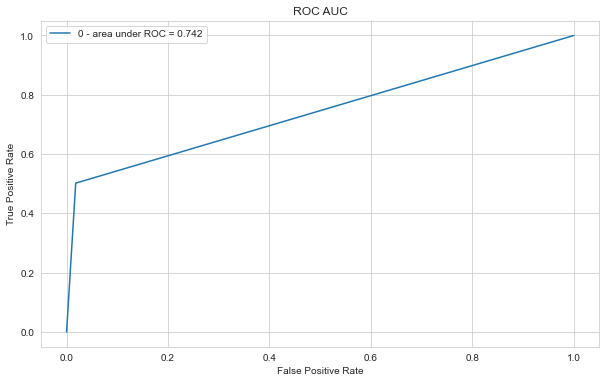

In [80]:
model_scoring = model_eval(naive_bayes["model"], X_test_over_sampled, y_test_over_sampled)
scores["Naive Bayes | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                              "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                              "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

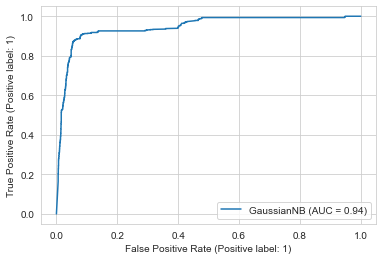

In [81]:
ROC_curve = plot_roc_curve(naive_bayes["model"], X_cv_over_sampled, y_cv_over_sampled)
scores["Naive Bayes | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [58]:
# Model Evaluation Comparision '%'

In [82]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('AUC', ascending=False)

In [83]:
score_df

,Accuracy,ROC,F1-Score,Recall-Score,AUC
XGBoost | Binary,97.54,96.77,96.63,96.77,99.64
Random Forest | Binary,97.07,97.00,96.05,97.00,99.60
AdaBoost Classifier | Binary,94.27,92.84,92.23,92.84,98.27
Support-Vector Machine | Binary,94.67,93.77,92.83,93.77,96.46
Naive Bayes | Binary,86.73,74.20,78.11,74.20,94.46
